# Linear Regression - Housing Prices

For those of you unfamiliar with Jupyter notebooks, this is a concise explanation.
Each "cell" of the notebook (a rectangular area) contains either explanatory text ("Markdown," like this cell) or Python/Keras commands ("Code"). By clicking on this cell, you select it (and the contours are highlighted). If you press "__Run__" in the menu, Jupyter processes the contents of this cell and moves on to the next. Scroll to the next cell, read the command and press __Run__ again. The result of the command (if any) will become visible. Just proceed through the notebook in this fashion, and return to previous cells, whenever necessary (either to re-read an explanation or command, or to change parameters). Please note that if you want to restart the entire notebook, you have to start at the top.

Let's start with importing the required plugins.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Linear Regression is usually the first machine learning algorithm that every data scientist comes across. It is a simple model, but nontheless good to understand, as it lays the foundation for other machine learning algorithms. In statistics, Linear Regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables.

Next, we will load the housing data.

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print("Data loaded.")

Data loaded.


We print the values of the __boston_dataset__ to understand what it contains.

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The house prices, indicated by the variable __MEDV__, is our target variable. The remaining variables are the feature variables, based on which we will predict the value of a house.

We will now load the data into a dataframe. To get an idea of the generated dataframe, we then print the first 5 rows of the data.

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


It's a good practice to explore your data before starting with the linear regression. Next, we will use some visualizations to understand the relationship of the target variable (house prices) with other features in the data.

Let’s first plot the distribution of the target variable __MEDV__.

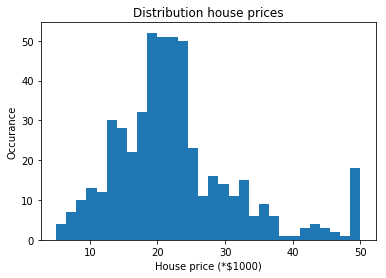

In [5]:
plt.hist(boston['MEDV'],30)
plt.title('Distribution house prices')
plt.xlabel('House price (*$1000)')
plt.ylabel('Occurance')
plt.show()

Now we can observe that the housing prices are normally distributed, with a few outliers. We suspect that the number of rooms in a house, represented by __RM__, has a strong correlation with the actual price of a house. Visualizing this using a scatterplot may confirm our suspicion.

<function matplotlib.pyplot.show(*args, **kw)>

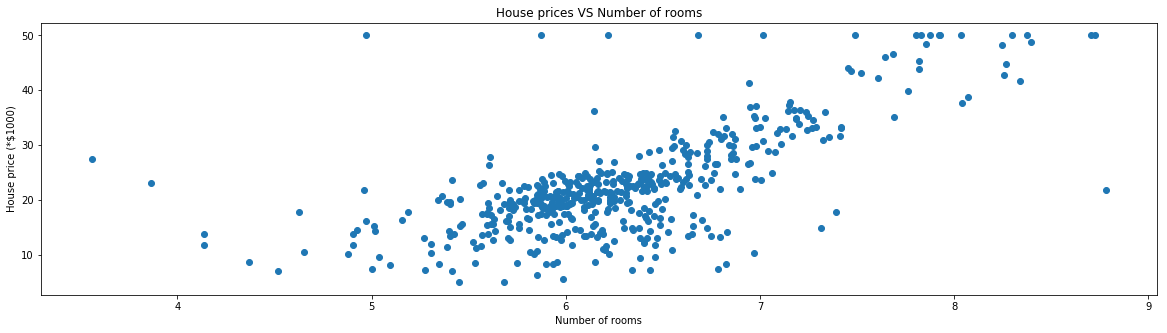

In [6]:
plt.figure(figsize=(20, 5))

features = boston['RM']
target = boston['MEDV']

plt.scatter(features, target)
plt.title('House prices VS Number of rooms')
plt.ylabel('House price (*$1000)')
plt.xlabel('Number of rooms')
plt.show

Looks like we were right! The house prices seem to increase as the number of rooms increases. Now we can build our Linear Regression model. First, we load the relevant data (in our case the house prices __MEDV__ and the number of rooms __RM__) to a separate data frame.

In [7]:
X = pd.DataFrame(boston['RM'], columns = ['RM'])
Y = boston['MEDV']
print("Data loaded.")

Data loaded.


Then, we can set up a Linear Regression model, and fit the data to this model.

In [8]:
lin_model = LinearRegression()
lin_model.fit(X, Y)
print("Model loaded.")

Model loaded.


Lastly, we generate a prediction by the model and visualize the results.

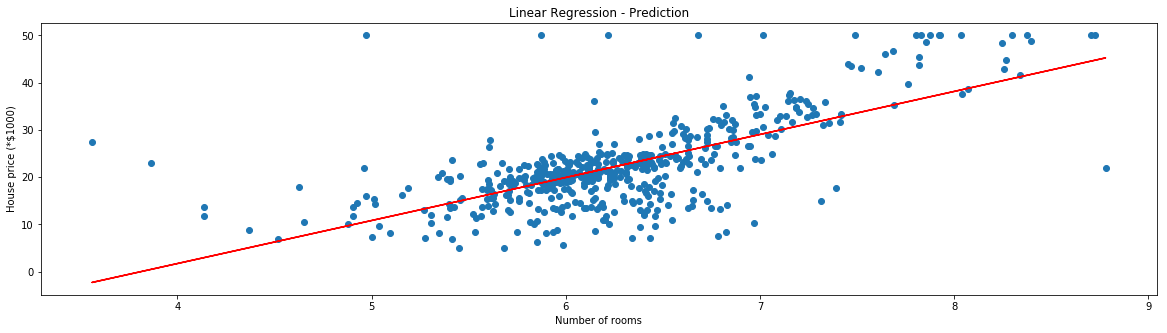

In [9]:
Y_pred = lin_model.predict(X)
plt.figure(figsize=(20, 5))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Linear Regression - Prediction')
plt.ylabel('House price (*$1000)')
plt.xlabel('Number of rooms')
plt.show()

The red line in the plot shows how our model predicts house prices will change, based on the number of rooms available in a house. A line for which the the error between the predicted values and the observed values (blue dots) is minimum is called the best fit line or the regression line.

These errors are also called residuals. The residuals can be visualized as the 'distance' between the observed data values and the regression line.

![](images/residuals.png)
>_http://wiki.engageeducation.org.au/further-maths/data-analysis/residuals/_